In [136]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [45]:
data=pd.read_csv("/Users/aryansmac/Downloads/churn2.csv")

In [38]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


# EDA



**-The CustomerID and Name are of no use in EDA and Prediction**


In [39]:
data.drop(['CustomerID','Name'],axis=1,inplace=True)
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


**-Gender and Location are 'object' data type and need lable encoding during EDA and Pre-Processing**

In [8]:
data.describe().round(3)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000,100000.000,100000.000,100000.000,100000.000
mean,44.027,12.490,65.053,274.394,0.498
std,15.280,6.926,20.231,130.463,0.500
min,18.000,1.000,30.000,50.000,0.000
25%,31.000,6.000,47.540,161.000,0.000
50%,44.000,12.000,65.010,274.000,0.000
75%,57.000,19.000,82.640,387.000,1.000
max,70.000,24.000,100.000,500.000,1.000


1. Minimum age to purchase the subscription is 18, and 70 is the most aged customer.
2. 1 month is the minimum duration and 2 year is the maximum duration for which customer has continued the subscription
3. On average customer has continued the subscription for 1 year
4. Monthely average bill is: 65 Dollar, Minimum is 30 and maximum is 100 Dollar
5. Averagely customer has used around 274 GB's of data

In [17]:
data.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

1. There is no null values in all the columns

In [27]:
data.duplicated().sum()

0

1. No duplicate columns are present

In [40]:
data_eda = data

In [42]:
lable_encoding = preprocessing.LabelEncoder()
data_eda[ 'Gender' ]= lable_encoding.fit_transform(data_eda[ 'Gender' ])
data_eda[ 'Location' ]= lable_encoding.fit_transform(data_eda[ 'Location' ])

1. Label Endcoding the Gender and Location Columns for EDA
2. Labels for Gender [Female:0, Male: 1]
3. Labels for Location [Chicago: 0, Houston: 1, Los Angeles: 2, Miami: 3, New York: 4]

In [43]:
data_eda

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


**Ploting the Box plot graph to check the outliers**

<Axes: xlabel='Total_Usage_GB'>

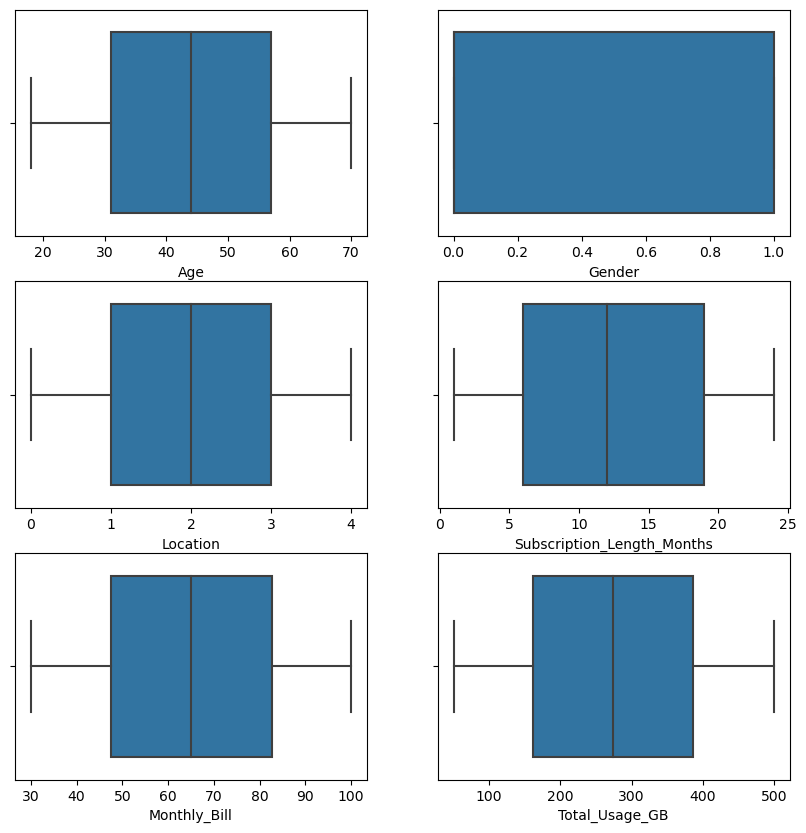

In [24]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10))
sns.boxplot(x= data_eda["Age"], ax = ax[0,0])
sns.boxplot(x= data_eda["Gender"], ax = ax[0,1])
sns.boxplot(x= data_eda["Location"], ax = ax[1,0])
sns.boxplot(x= data_eda["Subscription_Length_Months"], ax = ax[1,1])
sns.boxplot(x= data_eda["Monthly_Bill"], ax = ax[2,0])
sns.boxplot(x= data_eda["Total_Usage_GB"], ax = ax[2,1])


1. There is no outliers in any of the Feature

**Ploting the distribution plot graph to check the distribution of the every columns**

/var/folders/9y/610tzfp14gv7y3_n3zqsfvv80000gn/T/ipykernel_48493/3248064216.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_eda['Age'], ax = ax[0,0])
/var/folders/9y/610tzfp14gv7y3_n3zqsfvv80000gn/T/ipykernel_48493/3248064216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_eda[

<Axes: xlabel='Total_Usage_GB', ylabel='Density'>

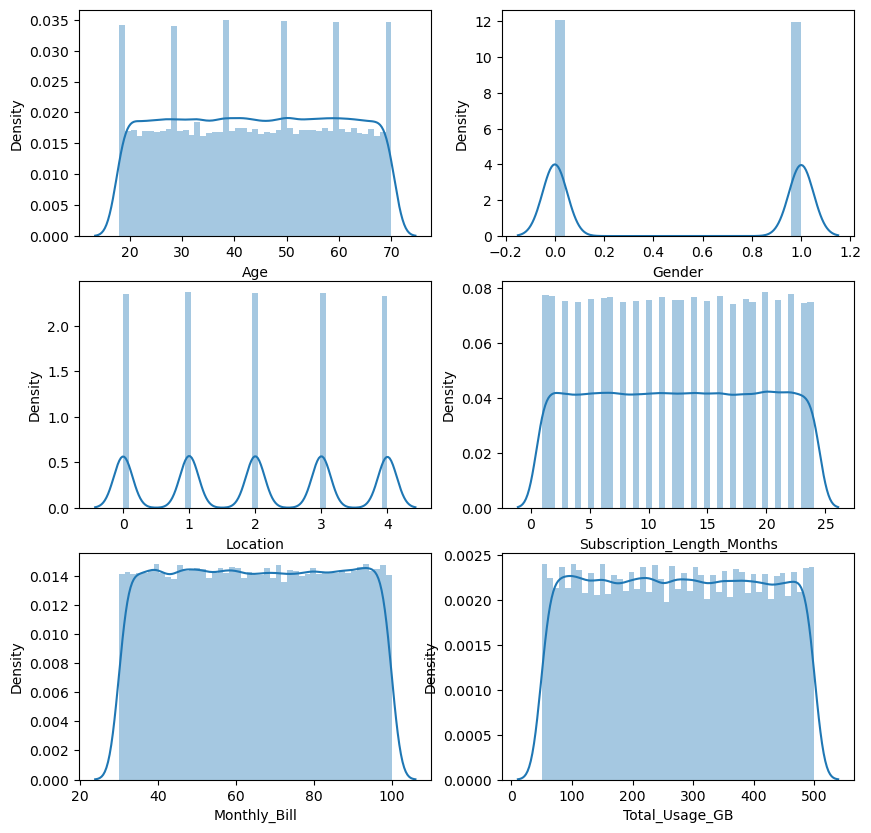

In [25]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10))
sns.distplot(data_eda['Age'], ax = ax[0,0])
sns.distplot(data_eda['Gender'], ax = ax[0,1])
sns.distplot(data_eda['Location'], ax = ax[1,0])
sns.distplot(data_eda['Subscription_Length_Months'], ax = ax[1,1])
sns.distplot(data_eda['Monthly_Bill'], ax = ax[2,0])
sns.distplot(data_eda['Total_Usage_GB'], ax = ax[2,1])

1. AGE, GENDER, LOCATION has mostely equal distribution
2. Subscription_Length_Months, Monthly_Bill and Total_Usage_GB has very little variation in the distribution of data

**Ploting the Scatter plot between every fearures**

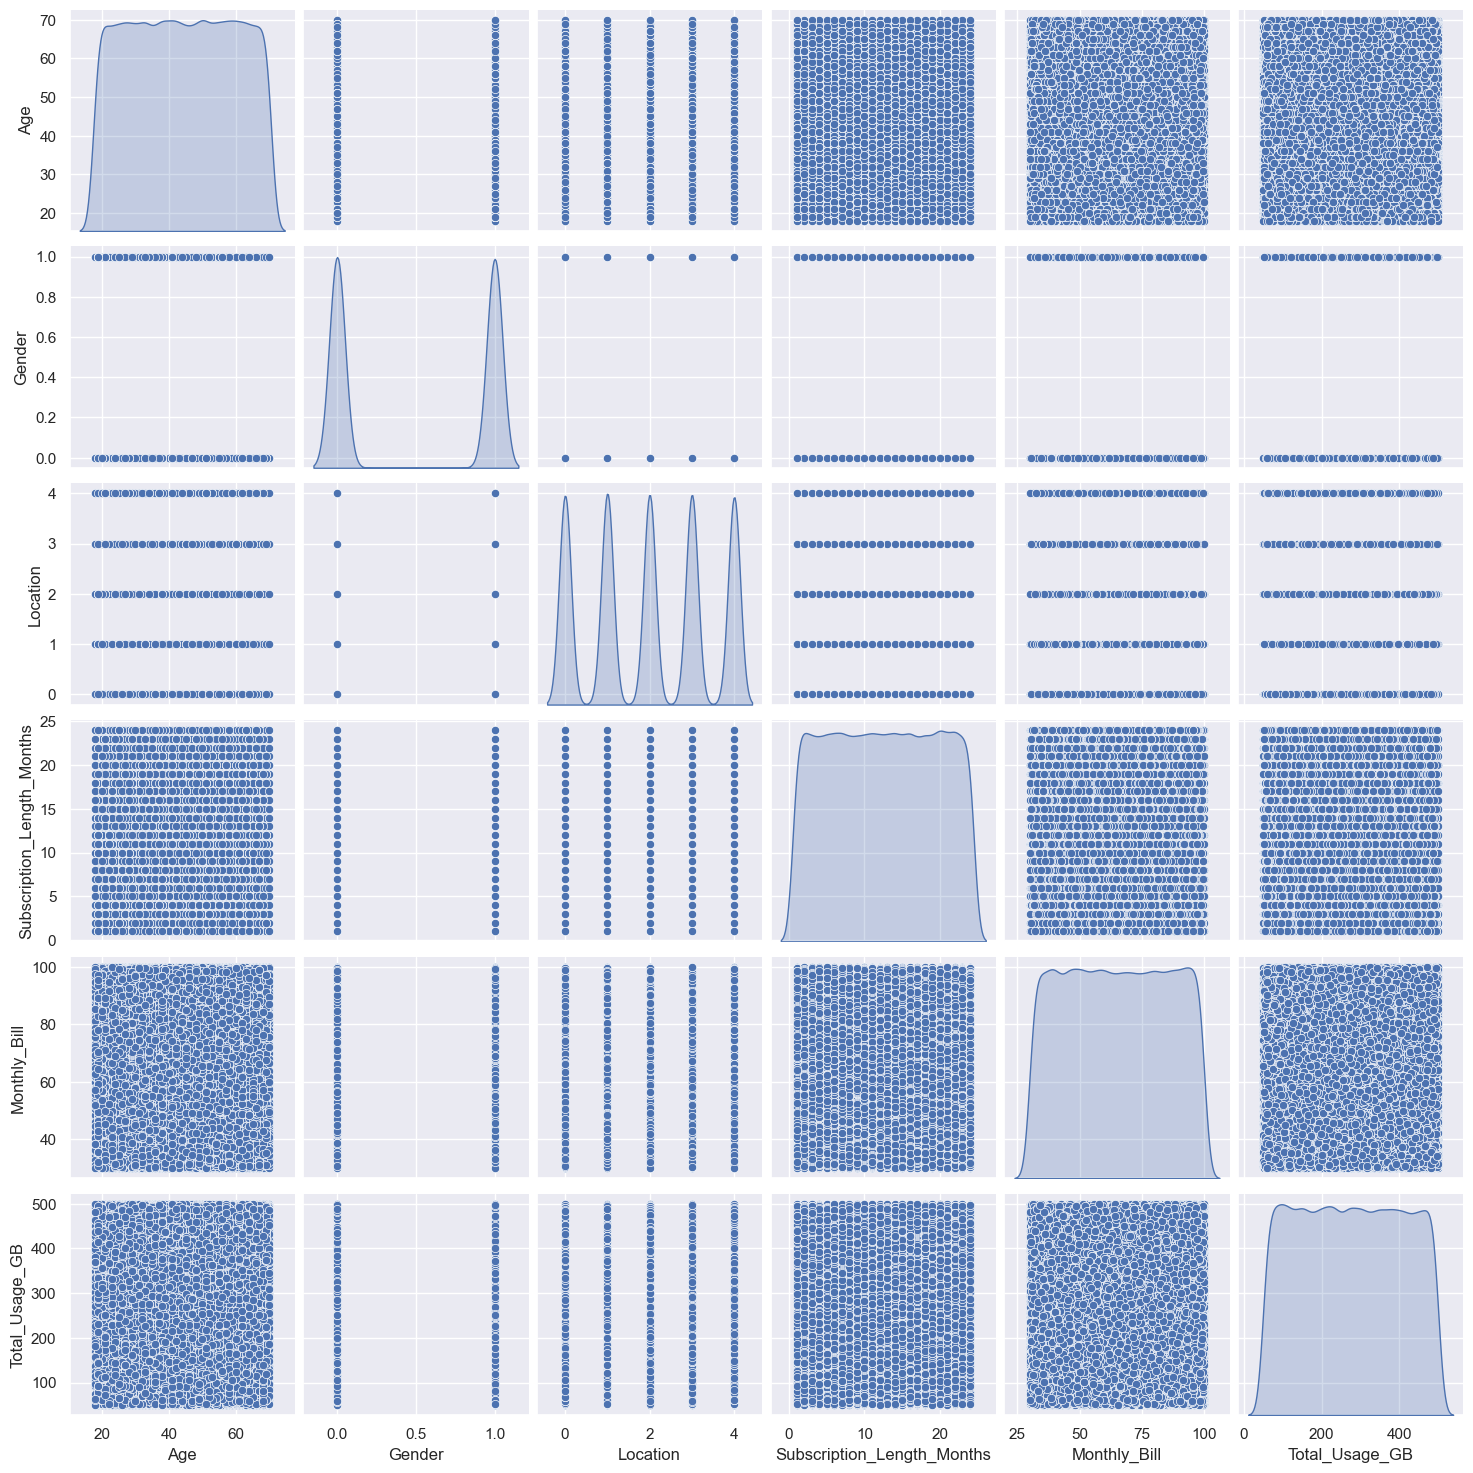

In [30]:
sns.set(rc={'figure.figsize':(20,30)})
cData_attr = data_eda.iloc[:, 0:6]
sns.pairplot(cData_attr, diag_kind='kde') 

1. AGE
    - Both male and female of age 18-70 are have taken the subscription
    - In every loaction every age group has taken the subscription
2. Gender
    - Both genders are present at every lacation
    - Both genders share equal praportion in Subscription_Length_Months, Monthly_Bill and Total_Usage_GB

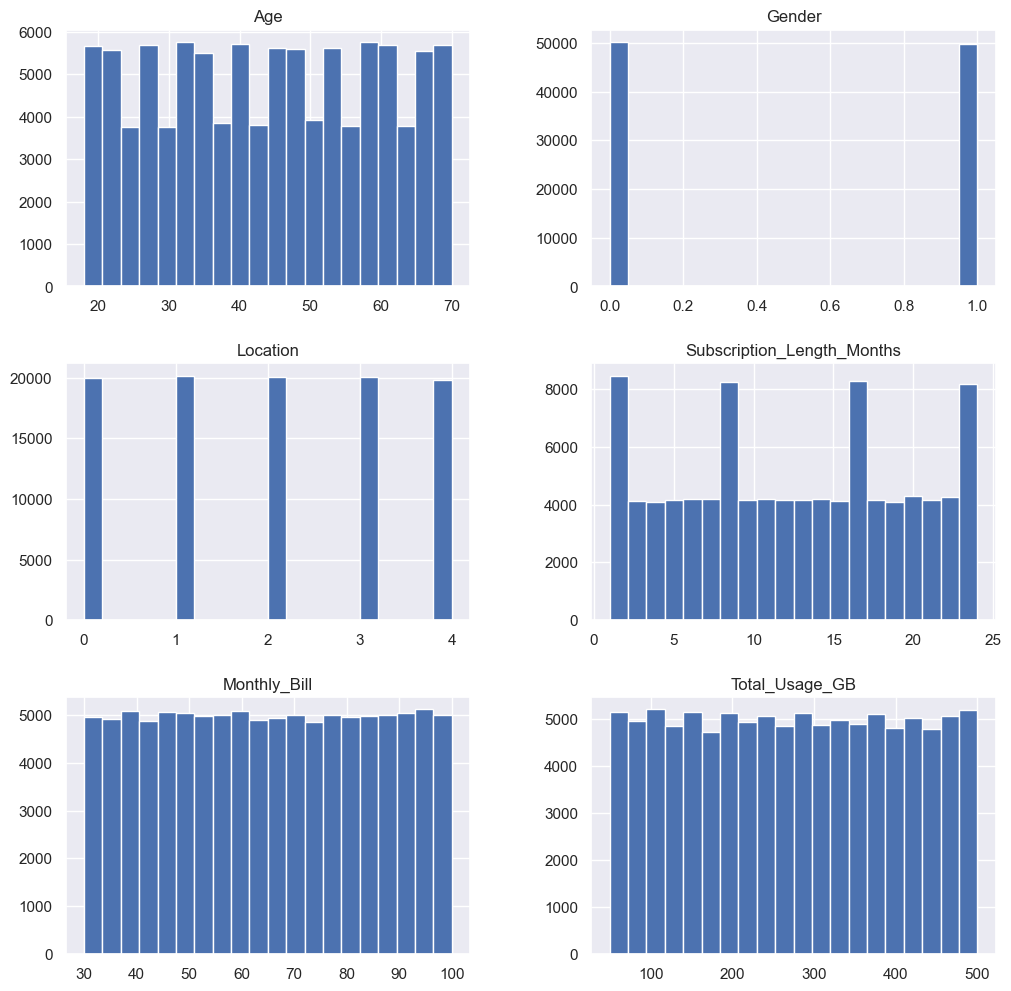

In [31]:
data_eda.iloc[:,0:6].hist(figsize=(12,12),bins=20)
plt.show()

1. According to this data higest number of user belong to age group of 18-19 year.
2. Most of the user prefer 1 month, 7-8 month, 15 month, or 24 month of subscription
3. There are equal number of user from every location

**Ploting the heatmap graph to observe the corelation between the features.**

<Axes: >

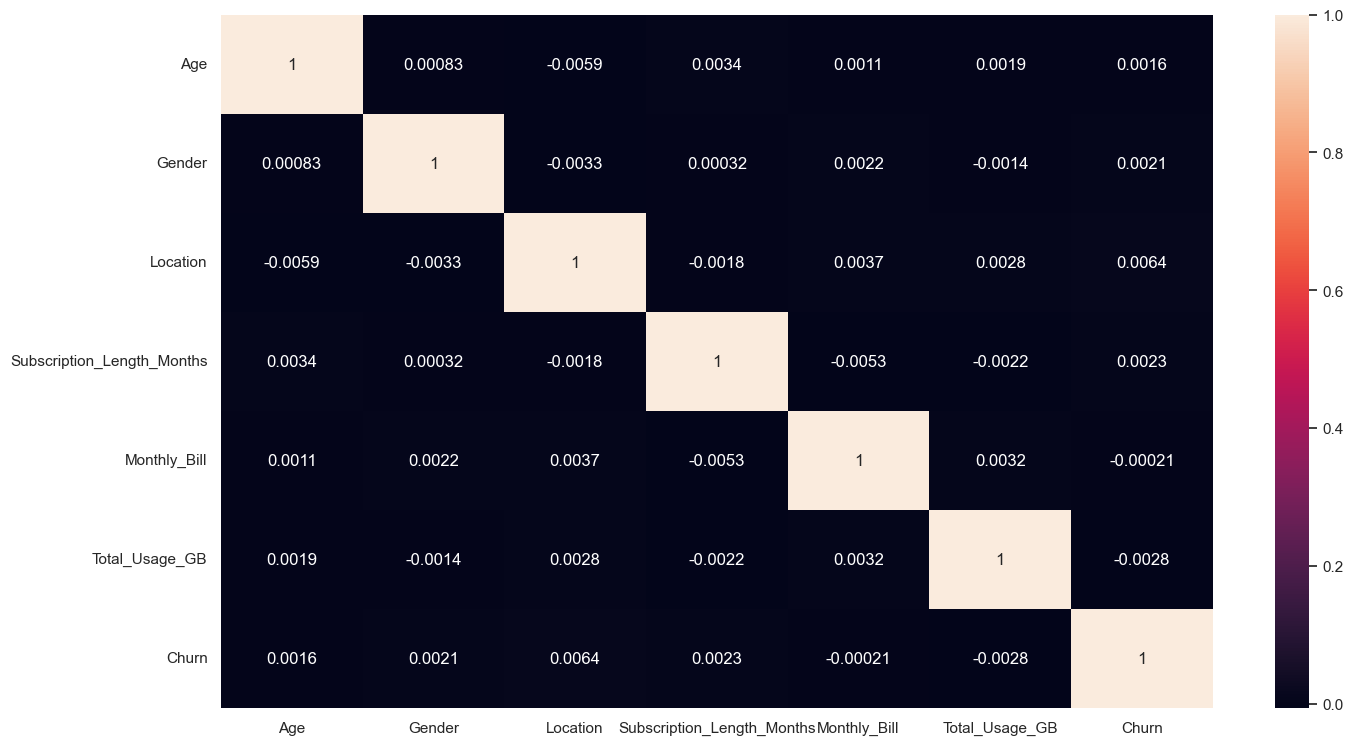

In [32]:
#ploting Heat Map to check the correlation of the each attribute
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)


1. All the feature are have close to 0 corelation between each other.
2. User Churn is has the highest corelation with Location

In [46]:
data['Location'].value_counts(ascending=True)

Location
New York       19813
Chicago        19958
Miami          20031
Los Angeles    20041
Houston        20157
Name: count, dtype: int64

In [49]:
label = ['New York','Chicago','Miami','Los Angeles','Houston']

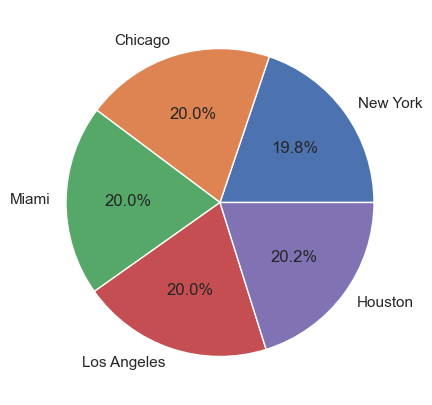

In [51]:
plt.figure(figsize=(5,5))
plt.pie(data['Location'].value_counts(ascending=True),labels=label, autopct='%1.1f%%')
plt.show() 

1. Highest number of users belong to Houston
2. Lowest number of user belon go New York
3. Chicage, Miami, Los Angeles share the same number of users

In [69]:
for i in data_eda:
    print(i," : ",data_eda[i].skew())

Age  :  -0.002688580535339188
Gender  :  0.008640210226389645
Location  :  0.004269231014538221
Subscription_Length_Months  :  -0.0016554824859520909
Monthly_Bill  :  -0.00032573400100265417
Total_Usage_GB  :  0.007113380196458567
Churn  :  0.008840218955990164


1. All the columns are perfectly balanced and having nearly 0 Skewness

# Pre-Processing

In [93]:
data=pd.read_csv("/Users/aryansmac/Downloads/churn2.csv")

In [94]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [95]:
y = np.array(data['Churn'])
y

array([0, 0, 0, ..., 1, 1, 1])

**Taking the outcome of data in y as array**

In [96]:
data.drop('Churn', axis=1, inplace=True)
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236
1,2,Customer_2,62,Female,New York,1,48.76,172
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460
3,4,Customer_4,36,Female,Miami,3,97.94,297
4,5,Customer_5,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226
99996,99997,Customer_99997,62,Female,New York,19,61.65,351
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251
99998,99999,Customer_99999,51,Female,New York,20,49.25,434


**Droping the outcome from the features of data**

**This function will pre-process 2-D DataFrame, 2-D array, 2-D List only.**

1. 'preprocessing_X' will do the all the pre-processing steps
    - It will drop the CustomerID and Name.
    - Encode the Gender and Location
    - And perform MinMax Normalisarion

In [97]:
def preprocessing_X(data):
    data = pd.DataFrame(data)
    #droping customer id and name
    data.drop(data.iloc[:,0:2],axis=1,inplace=True)
    #label encoding of gender and lacation
    data.iloc[:,1] = data.iloc[:,1].replace({'Female':0, 'Male': 1})
    data.iloc[:,2] = data.iloc[:,2].replace({'Chicago':0, 'Houston': 1, 'Los Angeles': 2, 'Miami':3, 'New York':4})
    #min max scaling
    #for age
    data.iloc[:,0] = (data.iloc[:,0] - 18) / (70-18)
    #for location
    data.iloc[:,2] = (data.iloc[:,2] - 0) / (4-0)
    #for Subscription_Length_Months
    data.iloc[:,3] = (data.iloc[:,3] - 1) / (24-1)
    #for monthly bill
    data.iloc[:,4] = (data.iloc[:,4] - 30) / (100-30)
    #for data usage
    data.iloc[:,5] = (data.iloc[:,5] - 50) / (500-50)
    data = data.astype(float)
    data = np.array(data)
    return data
    
    

In [98]:
data = preprocessing_X(data)

**Spliting the data for training and validation**

In [100]:
xtrain, x_val, ytrain, y_val = train_test_split(data, y, test_size=0.20, random_state=47)

# Model Training

**Creating the ANN modeek.**

In [115]:
# Defining the model
model_self = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])


In [116]:
model_self.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    model_self.fit(xtrain, ytrain, epochs=100,validation_split=0.2, shuffle=10,batch_size=5000)

Epoch 1/100
13/13 [==============================] - 1s 70ms/step - loss: 0.6935 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 2/100
13/13 [==============================] - 1s 66ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 3/100
13/13 [==============================] - 1s 68ms/step - loss: 0.6932 - accuracy: 0.5068 - val_loss: 0.6933 - val_accuracy: 0.5013
Epoch 4/100
13/13 [==============================] - 1s 67ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5026
Epoch 5/100
13/13 [==============================] - 1s 66ms/step - loss: 0.6930 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 6/100
13/13 [==============================] - 1s 65ms/step - loss: 0.6928 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 7/100
13/13 [==============================] - 1s 65ms/step - loss: 0.6928 - accuracy: 0.5118 - val_loss: 0.6934 - val_accuracy: 0.5041
Epoch 

13/13 [==============================] - 1s 72ms/step - loss: 0.6789 - accuracy: 0.5678 - val_loss: 0.7045 - val_accuracy: 0.5013
Epoch 59/100
13/13 [==============================] - 1s 71ms/step - loss: 0.6788 - accuracy: 0.5658 - val_loss: 0.7067 - val_accuracy: 0.4971
Epoch 60/100
13/13 [==============================] - 1s 71ms/step - loss: 0.6777 - accuracy: 0.5667 - val_loss: 0.7068 - val_accuracy: 0.5024
Epoch 61/100
13/13 [==============================] - 1s 71ms/step - loss: 0.6775 - accuracy: 0.5691 - val_loss: 0.7055 - val_accuracy: 0.5033
Epoch 62/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6763 - accuracy: 0.5738 - val_loss: 0.7085 - val_accuracy: 0.5016
Epoch 63/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6758 - accuracy: 0.5733 - val_loss: 0.7091 - val_accuracy: 0.5011
Epoch 64/100
13/13 [==============================] - 1s 76ms/step - loss: 0.6756 - accuracy: 0.5749 - val_loss: 0.7098 - val_accuracy: 0.5005
Epoch 65/100

In [118]:
model_self.evaluate(x_val,y_val)

625/625 [==============================] - 3s 4ms/step - loss: 0.7425 - accuracy: 0.4943


[0.7425074577331543, 0.49434998631477356]

1. Model has Validation Accuracy of 49.43%, and Validation Loss of 74.25%

**2. Logestic Regression with 10000 Steps**

In [119]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [120]:
score_lr = lr.score(x_val, y_val)
score_lr

0.5011

1. Logestic Regression is Giving Accuracy of 50.11%

**3. Dicision Tree**

In [121]:
dt = tree.DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [131]:
score_dt = dt.score(x_val, y_val)
score_dt

0.4981

1. Dicision Tree is also Giving Accuracy of 49.81%

**4. SVC with Linear Kernel**

In [123]:
svc = SVC(C=.1, kernel='linear', gamma=1)
svc.fit(xtrain, ytrain)

SVC(C=0.1, gamma=1, kernel='linear')

In [132]:
score_svc = svc.score(x_val, y_val)
score_svc

0.5009

1. Support Vector Classifier is also Giving Accuracy of 50.09%

**5. KNN.**

- Using Elbow Method to find the best N Neighbors.

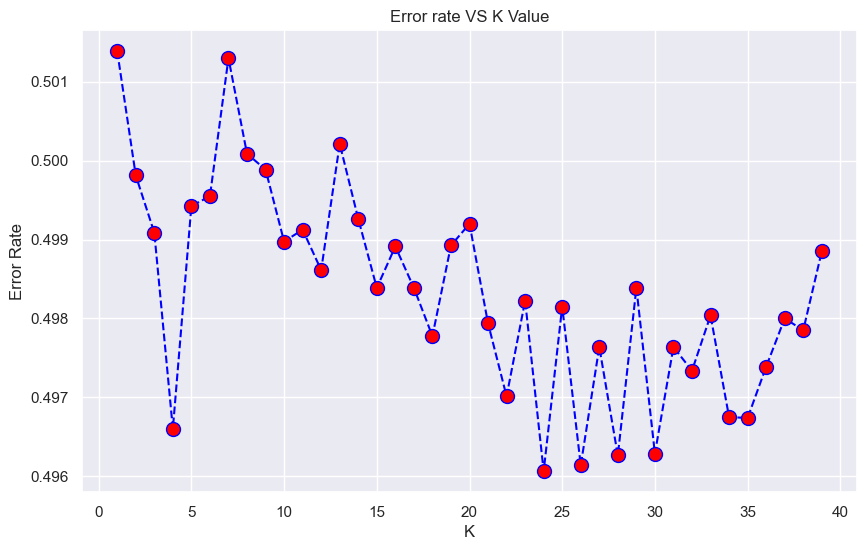

In [125]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, xtrain, ytrain, cv=10)
    error_rate.append(1-score.mean())
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') 
plt.savefig('Error_rate_vs_kvalue.png')

- 24 is the best value for k.

In [126]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=24)

In [133]:
score_knn = knn.score(x_val, y_val)
score_knn

0.50165

1. KNN is also Giving Accuracy of 50.16%

**6. GaussianNB.**

In [128]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [134]:
score_gnb = gnb.score(x_val, y_val)
score_gnb

0.50315

1. GaussianNB is also Giving Accuracy of 50.31%

**7. Random Forest**

In [130]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=20)
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [135]:
score_rf = rf.score(x_val, y_val)
score_rf

0.4969

1. Random Forestr is Giving Accuracy of 49.69%